In [1]:
import numpy as np
from math import e
from PIL import Image
import glob
import cv2
from matplotlib import pyplot as plt
import matplotlib
from math import exp
from math import sqrt

In [2]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianHP(D0,image,u,v):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            base[x,y] = 1-exp(((-distance((x,y),(u,v))**2)/(2*(D0**2))))
    return base

In [3]:
def idealHP(D0,image,u,v):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            if distance((x,y),(u,v)) <= D0:
                base[x,y] = 0
            else:
                base[x,y] = 1
    return base

In [4]:
def hor_line(D0, image, u):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            if abs(x-u) <= D0:
                base[x,y] = 0
    return base

In [5]:
def ver_line(D0, image, v):
    base = np.ones(image.shape[0:2])
    rows, cols = image.shape[0:2]
    for y in range(cols):
        for x in range(rows):
            if abs(y-v) <= D0:
                base[x,y] = 0
    return base

In [6]:
def img_chnnls(rgb):
    channels = []
    ch_count = len(rgb[0][0])
    for i in range(ch_count):
        channels.append(rgb[:,:,i])
    return np.array(channels)

In [7]:
def dft_chnnls(channelss):
    dfts = []
    for ch in channelss:
        dfts.append(np.fft.fftshift(np.fft.fft2(ch)))
    return np.array(dfts)

In [8]:
def show_dfts(chnnls_dfts,image_name):
    plt.rcParams['figure.figsize'] = [10,3]
    for i in range(len(chnnls_dfts)):
        plt.subplot(1,3,i+1)
        plt.imshow(np.log(np.abs(chnnls_dfts[i])),'gray')
        plt.suptitle('dfts of image #{}'.format(image_name))
        plt.axis('off')
    plt.show()

In [9]:
def inv_dfts(dfts):
    new_chnnls = []
    for i in range(len(dfts)):
        new_chnnls.append(np.real(np.fft.ifft2(np.fft.ifftshift(dfts[i]))))
    return np.array(new_chnnls)

In [10]:
def show_channels(channels):
    plt.rcParams['figure.figsize'] = [10,3]
    for i in range(len(channels)):
        plt.subplot(1,3,i+1)
        plt.imshow(channels[i],'gray')
#         plt.suptitle('dfts of image #{}'.for)
        plt.axis('off')
    plt.show()

In [11]:
def grayofchannels_hsv(channels):
    output = np.dstack(channels)
    #output = np.float32(output)
    output = output.astype(np.uint8)
    output = cv2.cvtColor(output, cv2.COLOR_HSV2BGR)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    output = np.clip (output, 0,255)
    plt.imshow(output,'gray')
    plt.show()
    return output

In [12]:
def grayofchannels_bgr(channels):
    output = np.dstack(channels)
    #output = np.float32(output)
    output = output.astype(np.uint8)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    output = np.clip (output, 0,255)
    plt.imshow(output,'gray')
    plt.show()
    return output

In [13]:
def grayofchannels_YCrCb(channels):
    output = np.dstack(channels)
    #output = np.float32(output)
    output = output.astype(np.uint8)
    output = cv2.cvtColor(output, cv2.COLOR_YCrCb2BGR)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    output = np.clip (output, 0,255)
    plt.imshow(output,'gray')
    plt.show()
    return output

In [14]:
def grayofchannels_Lab(channels):
    output = np.dstack(channels)
    #output = np.float32(output)
    output = output.astype(np.uint8)
    output = cv2.cvtColor(output, cv2.COLOR_Lab2BGR)
    output = cv2.cvtColor(output, cv2.COLOR_BGR2GRAY)
    output = np.clip (output, 0,255)
    plt.imshow(output,'gray')
    plt.show()
    return output

In [19]:
def notch_gauss(image, x, y,D0):
    a,b = image.shape
    filt1 = gaussianHP(D0, image, x, y)
    filt2 = gaussianHP(D0, image, (a/2-x)*2 + x, (b/2-y)*2 + y)
    filt = filt1*filt2
    return filt

In [20]:
def notch_hor(image, x, D0):
    a,b = image.shape
    filt1 = hor_line(D0, image, x)
    filt2 = hor_line(D0, image, (a/2-x)*2 + x)
    filt = filt1*filt2
    return filt

In [21]:
def notch_ver(image, x, D0):
    a,b = image.shape
    filt1 = ver_line(D0, image, x)
    filt2 = ver_line(D0, image, (b/2-x)*2 + x)
    filt = filt1*filt2
    return filt

In [15]:
images = np.array([cv2.imread(file) for file in glob.glob("C:/Users/sherw/OneDrive/Desktop/DIP_HW3/inputs/p5/b/*.png")])

In [1220]:
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2HSV) for img in images]

In [1215]:
# images = [cv2.cvtColor(img, cv2.COLOR_BGR2Lab) for img in images]

In [16]:
images = [cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb) for img in images]

# image 1:

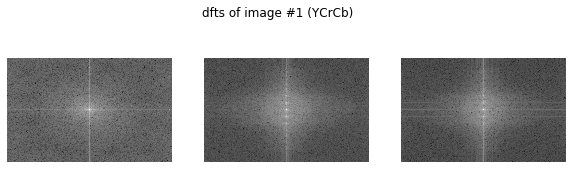

In [72]:
chs = img_chnnls(images[0])
dft = dft_chnnls(chs)
show_dfts(dft,'1 (YCrCb)')

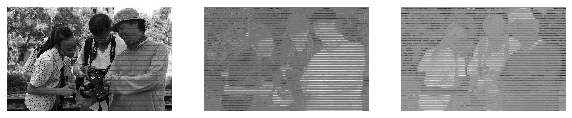

In [73]:
show_channels(chs)

In [64]:
a,b = np.shape(dft[0])
coordinates_gauss = [[274,b/2],[231.5,b/2],[189.5,b/2],[146.7,b/2],[104.5,b/2]\
                     ,[62,b/2],[14.7,b/2]]
coordinates_gauss2 = [[274,b/2],[231.7,b/2],[190,b/2],[158.3,b/2],[118.5,b/2]\
                     ,[83.6,b/2],[41.2,b/2]]
coordinates_gauss3 = [[273.7,b/2],[231.5,b/2],[200,b/2],[163,b/2],[124,b/2]\
                     ,[83.6,b/2],[41.5,b/2]]

bs = np.ones(np.shape(dft[0]))
bs2 = np.ones(np.shape(dft[0]))
bs3 = np.ones(np.shape(dft[0]))

D0 = 6
for coors in coordinates_gauss:
     bs *= notch_gauss(dft[0], coors[0],coors[1] ,D0)
D0 = 6
for coors in coordinates_gauss2:
     bs2 *= notch_gauss(dft[0], coors[0],coors[1] ,D0)
D0 = 6
for coors in coordinates_gauss3:
     bs3 *= notch_gauss(dft[0], coors[0],coors[1] ,D0)

In [65]:
dft_fil = np.array(dft)

channels_to_filter = [0]
for xx in channels_to_filter:
    dft_fil[xx] = dft[xx] * bs
    
channels_to_filter2 = [1]
for xx in channels_to_filter2:
    dft_fil[xx] = dft[xx] * bs2 

channels_to_filter3 = [2]
for xx in channels_to_filter3:
    dft_fil[xx] = dft[xx] * bs3

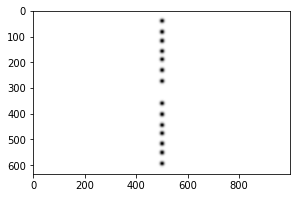

In [74]:
plt.imshow(bs2,'gray')
plt.show()

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


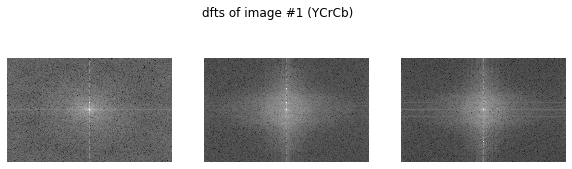

In [75]:
show_dfts(dft_fil,'1 (YCrCb)')

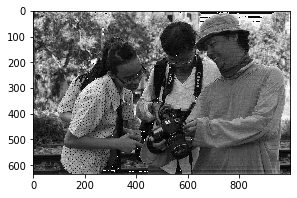

In [76]:
invdft = inv_dfts(dft_fil)
x = grayofchannels_YCrCb(invdft)

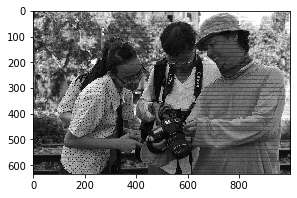

In [77]:
image = cv2.cvtColor(images[0], cv2.COLOR_YCrCb2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,'gray')

# image 2:

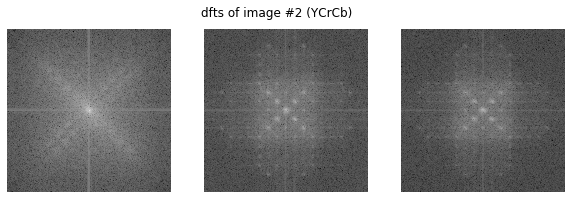

In [57]:
chs = img_chnnls(images[1])
dft = dft_chnnls(chs)
show_dfts(dft,'2 (YCrCb)')

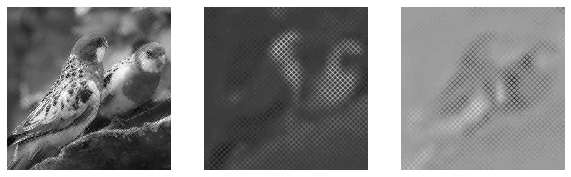

In [58]:
show_channels(chs)

In [90]:
a,b = np.shape(dft[0])
coordinates_gauss = [[245,245],[214,214],[177,184],[150,150],[250,320],[220,350],[186,384],[152,415],[174,435],[209,399]\
                     ,[242,367]]
coordinates_gauss2 = [[198,198],[262,198],[230,230],[198,262],[263,263],[230,295],[295,230],[263,326],[230,358],[198,326]\
                ,[262,390],[198,390]]
coordinates_hor2 = [96,197,228,260]
coordinates_ver2 = [262,200,392]

bs = np.ones(np.shape(dft[0]))
bs2 = np.ones(np.shape(dft[0]))

for i in range(bs2.shape[0]):
    for j in range(bs2.shape[1]):
        if distance((a/2,b/2),(i,j)) > 200:
            bs2[i,j] = 0

D0 = 6
for coors in coordinates_gauss:
     bs *= notch_gauss(dft[0], coors[0],coors[1] ,D0)

for coors in coordinates_gauss2:
     bs2 *= notch_gauss(dft[0], coors[0],coors[1] ,D0)

D0 = 2
for coors in coordinates_hor2:
     bs2 *= notch_hor(dft[0], coors, D0)

for coors in coordinates_ver2:
     bs2 *= notch_ver(dft[0], coors, D0)

In [91]:
dft_fil = np.array(dft)

channels_to_filter = [0]
for xx in channels_to_filter:
    dft_fil[xx] = dft[xx] * bs
    
channels_to_filter2 = [1,2]
for xx in channels_to_filter2:
    dft_fil[xx] = dft[xx] * bs2 

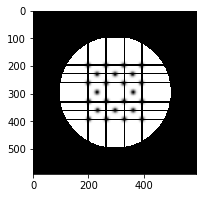

In [92]:
plt.imshow(bs2,'gray')
plt.show()

C:\Users\sherw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


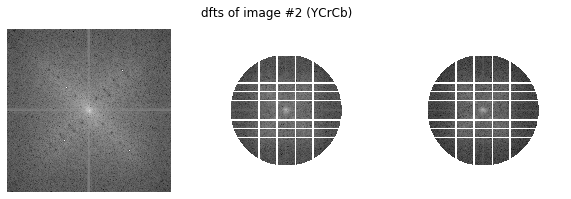

In [93]:
show_dfts(dft_fil,'2 (YCrCb)')

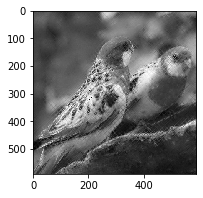

In [94]:
invdft = inv_dfts(dft_fil)
x = grayofchannels_YCrCb(invdft)

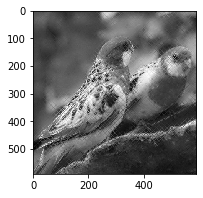

In [95]:
image = cv2.cvtColor(images[1], cv2.COLOR_YCrCb2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,'gray')

# image 3:

In [82]:
chs = img_chnnls(images[2])
dft = dft_chnnls(chs)
show_dfts(dft,'3 (YCrCb)')

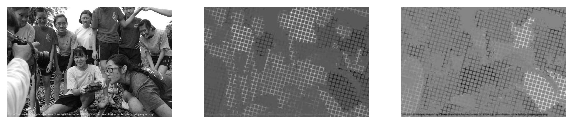

In [80]:
show_channels(chs)

In [83]:
a,b = np.shape(dft[0])
coordinates_gauss = [[273.4,42.2],[281.4,84.5],[288.4,126],[295.3,167.5]\
                     ,[302.8,209.5],[27.2,389],[55.5,377.8],[83.5,366.5]\
                    ,[111.3,355],[139.8,343.8],[258.6,358.5],[251.3,316]\
                     ,[244,273.8],[236,232.4],[228.7,190.9],[238.7,411.4]\
                     ,[210.5,422.3],[182.6,433.7],[154.2,444.7],[126.2,455.9]]

bs = np.ones(np.shape(dft[0]))

D0 = 6
for coors in coordinates_gauss:
     bs *= notch_gauss(dft[0], coors[0],coors[1] ,D0)


In [84]:
dft_fil = np.array(dft)

channels_to_filter = [0,1,2]
for xx in channels_to_filter:
    dft_fil[xx] = dft[xx] * bs
    

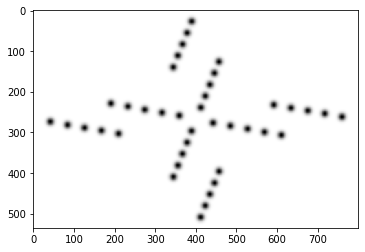

In [93]:
plt.imshow(bs,'gray')
plt.show()

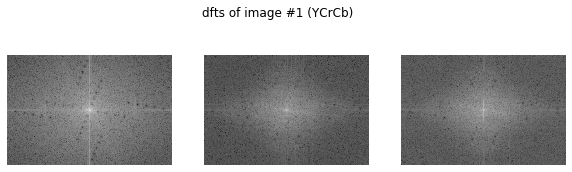

In [100]:
show_dfts(dft_fil,'1 (YCrCb)')

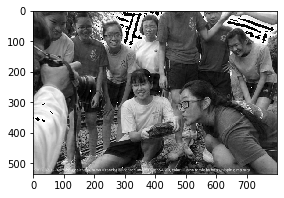

In [95]:
invdft = inv_dfts(dft_fil)
x = grayofchannels_YCrCb(invdft)

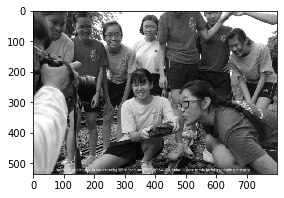

In [96]:
image = cv2.cvtColor(images[2], cv2.COLOR_YCrCb2BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,'gray')